<a href="https://colab.research.google.com/github/acsevillam/G4Training/blob/plotting/HVL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy import stats
from scipy.stats import t

In [132]:
K0='662keV'
x  = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) # cm
I  = np.array([
              [0.417370,0.369720,0.325894,0.287214,0.254958,0.225006,0.198619,0.175806,0.155282,0.136490,0.120985],
              [0.418825,0.369542,0.326590,0.287968,0.254034,0.224060,0.198269,0.175259,0.155707,0.136339,0.120675],
              [0.418423,0.369822,0.326658,0.288685,0.253905,0.225323,0.197915,0.174636,0.154955,0.136447,0.120665],
              [0.417338,0.368608,0.325867,0.288268,0.254420,0.224547,0.198223,0.175797,0.154889,0.135931,0.120993],
              [0.417683,0.368669,0.326195,0.288056,0.254812,0.224381,0.199287,0.175415,0.154903,0.136689,0.120455],
              ]) # counts

In [133]:
I_mean=np.mean(I,0)
I_std=np.std(I,0)

In [134]:
xx = np.linspace(0, 1, 10000, endpoint=True)
bspl = make_interp_spline(x, I_mean/I_mean[0], k=3)

In [135]:
HVL=round(xx[np.where(bspl(xx) < 0.5)][0],3)

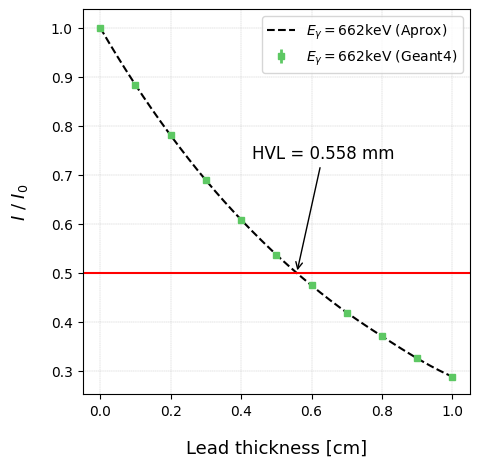

In [137]:
fig=plt.figure(figsize=(5,5))
#fig.suptitle("title", fontsize=16)

ax1=fig.add_subplot(111)
ax1.set_xlabel('Lead thickness [cm]', fontsize=13,labelpad=15)
ax1.set_ylabel(r'$I$ / $I_{0}$', fontsize=13,labelpad=15)
#ax1.set_xscale("log")
#ax1.set_yscale("log")
ax1.grid(linestyle='--', linewidth=0.25)

ax1.errorbar(x, I_mean/I_mean[0], I_std/I_mean[0], drawstyle="default", linestyle='none', label=r'$E_{\gamma}=$'+K0+' (Geant4)', linewidth=2,  elinewidth=2, marker='s', color="#5DC863FF", ms=5)
ax1.plot(xx, bspl(xx), '--', color='black', label=r'$E_{\gamma}=$'+K0+' (Aprox)')
ax1.axhline(y = 0.5, color = 'r', linestyle = '-')
ax1.annotate('HVL = '+str(HVL)+' mm', (HVL, 0.5),
            xytext=(0.805, 0.65), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            fontsize=12,
            horizontalalignment='right', verticalalignment='top')
ax1.legend()